In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *

plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

# pdb_list, steps = dataset["old"]

def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, rerun=1, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(rerun):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


In [4]:
d = pd.read_csv("/Users/weilu/Research/server/april_second_2019/test_set/seq_info.csv", index_col=0)
pdb_list = d.query("length < 150 and index % 2 == 0")["protein"].tolist()

In [5]:
print(pdb_list)

['T0759-D1', 'T0953s2-D1', 'T0943-D1', 'T0773-D1', 'T0816-D1', 'T0854-D2', 'T0767-D1', 'T0853-D1', 'T0958-D1', 'T0834-D2', 'T0960-D3', 'T0862-D1', 'T0912-D3', 'T0898-D1', 'T0824-D1', 'T0782-D1', 'T0830-D2', 'T0761-D2', 'T0968s1-D1', 'T0870-D1', 'T0838-D1', 'T0803-D1']


In [ ]:
f"decoyData/{name}/{name}_{offset}.pdb"

In [33]:
name = "5guw"
offset = -50
pdb_file = f"/Users/weilu/Research/server/april_second_2019/weighted/clean/decoyData/{name}/{name}_{offset}.pdb"

In [35]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure('X', pdb_file)

In [49]:
inside_or_not_table = []
for res in structure.get_residues():
    inside_or_not_table.append(int(abs(res["CA"].get_vector()[-1]) < 15))
    # print(int(abs(ca.get_vector()[-1]) < 15))

In [52]:
def get_inside_or_not_table(pdb_file):
    parser = PDBParser()
    structure = parser.get_structure('X', pdb_file)
    inside_or_not_table = []
    for res in structure.get_residues():
        inside_or_not_table.append(int(abs(res["CA"].get_vector()[-1]) < 15))
    return inside_or_not_table

In [54]:
np.array([1, 2, 3]) == np.array([2,4,2])

array([False, False, False])

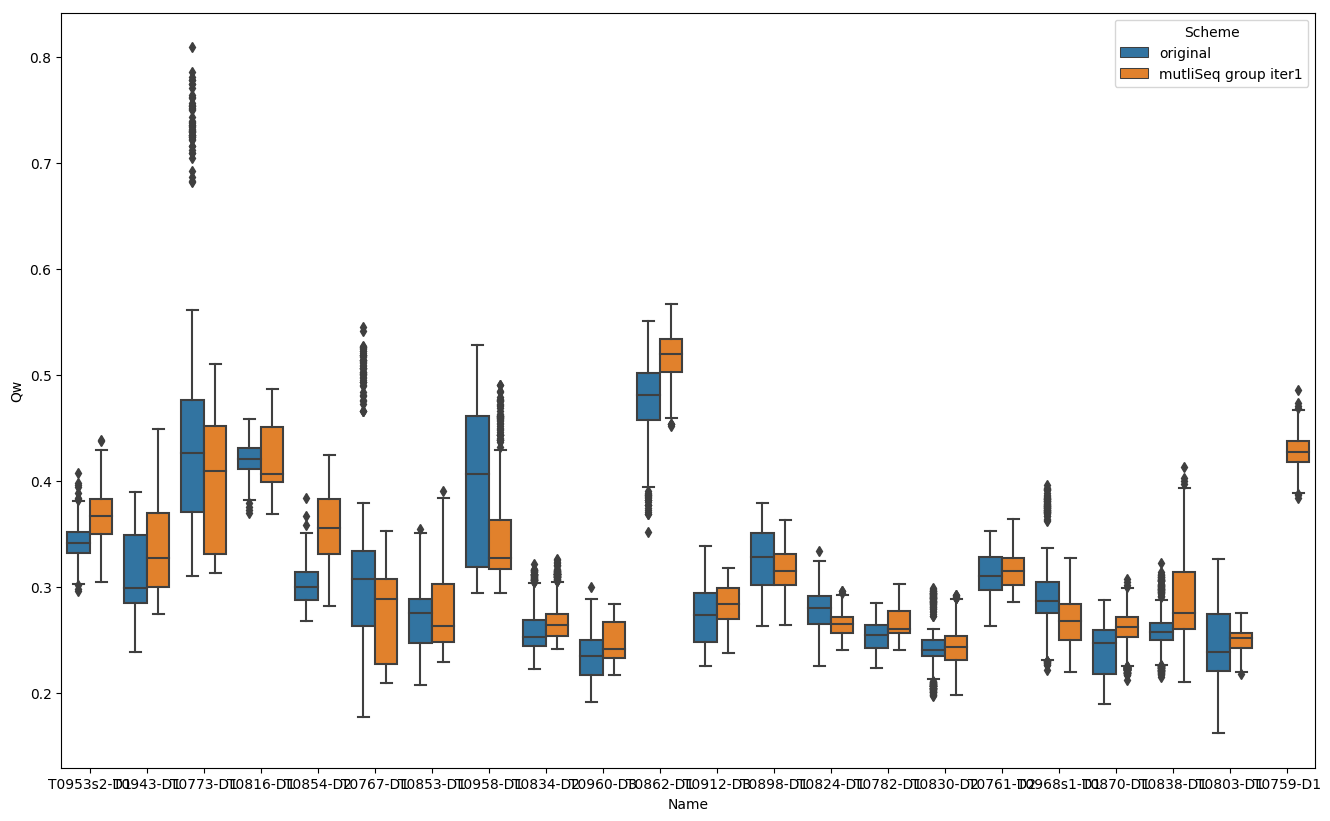

In [10]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_test_set_04-18.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_test_set_04-18.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter2_test_set_04-18.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_test_set_04-30.csv", index_col=0)

d = pd.concat([
                data2.assign(Scheme="original"), 
#                 data1.assign(Scheme="mutliSeq iter0"),  
#     data3.assign(Scheme="mutliSeq iter2"),  
    data4.assign(Scheme="mutliSeq group iter1"),  
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


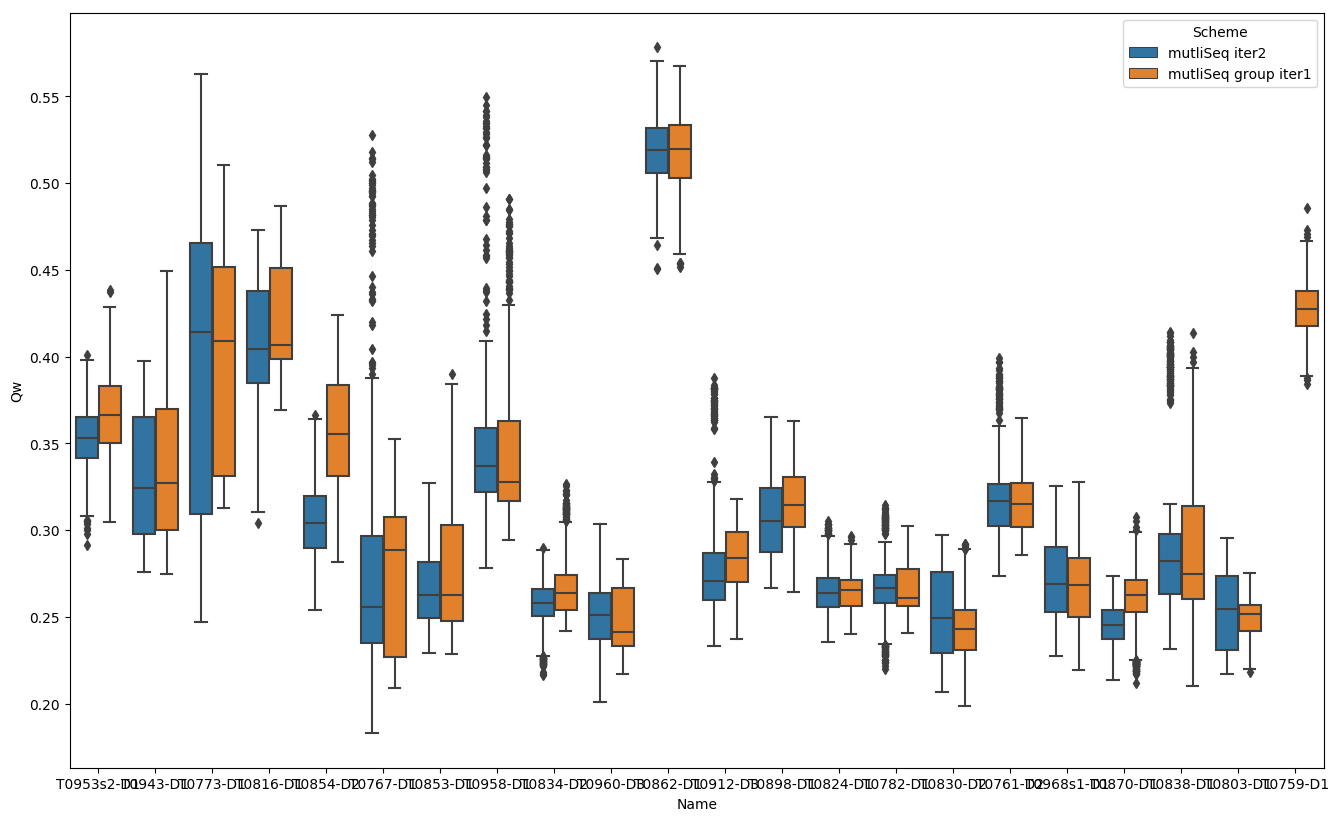

In [9]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_test_set_04-18.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_test_set_04-18.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter2_test_set_04-18.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_test_set_04-30.csv", index_col=0)

d = pd.concat([
#                 data2.assign(Scheme="original"), 
#                 data1.assign(Scheme="mutliSeq iter0"),  
    data3.assign(Scheme="mutliSeq iter2"),  
    data4.assign(Scheme="mutliSeq group iter1"),  
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


In [29]:
data.head()

,index,Steps,Qw,Rg,Tc,Energy,Run,Name,Rerun
0,950,3804000,0.330285,9.366904,64,-266.878151,Run0,T0953s2-D1,0
1,951,3808000,0.354670,9.233558,72,-291.796293,Run0,T0953s2-D1,0
2,952,3812000,0.342155,9.456811,64,-283.629112,Run0,T0953s2-D1,0
3,953,3816000,0.309002,9.282075,74,-282.291680,Run0,T0953s2-D1,0
4,954,3820000,0.317719,9.195830,66,-269.939400,Run0,T0953s2-D1,0


In [30]:
data3.head()

,index,Steps,Qw,Rg,Tc,Energy,Run,Name,Rerun
0,950,3804000,0.330285,9.366904,64,-266.878151,Run0,T0953s2-D1,0
1,951,3808000,0.354670,9.233558,72,-291.796293,Run0,T0953s2-D1,0
2,952,3812000,0.342155,9.456811,64,-283.629112,Run0,T0953s2-D1,0
3,953,3816000,0.309002,9.282075,74,-282.291680,Run0,T0953s2-D1,0
4,954,3820000,0.317719,9.195830,66,-269.939400,Run0,T0953s2-D1,0


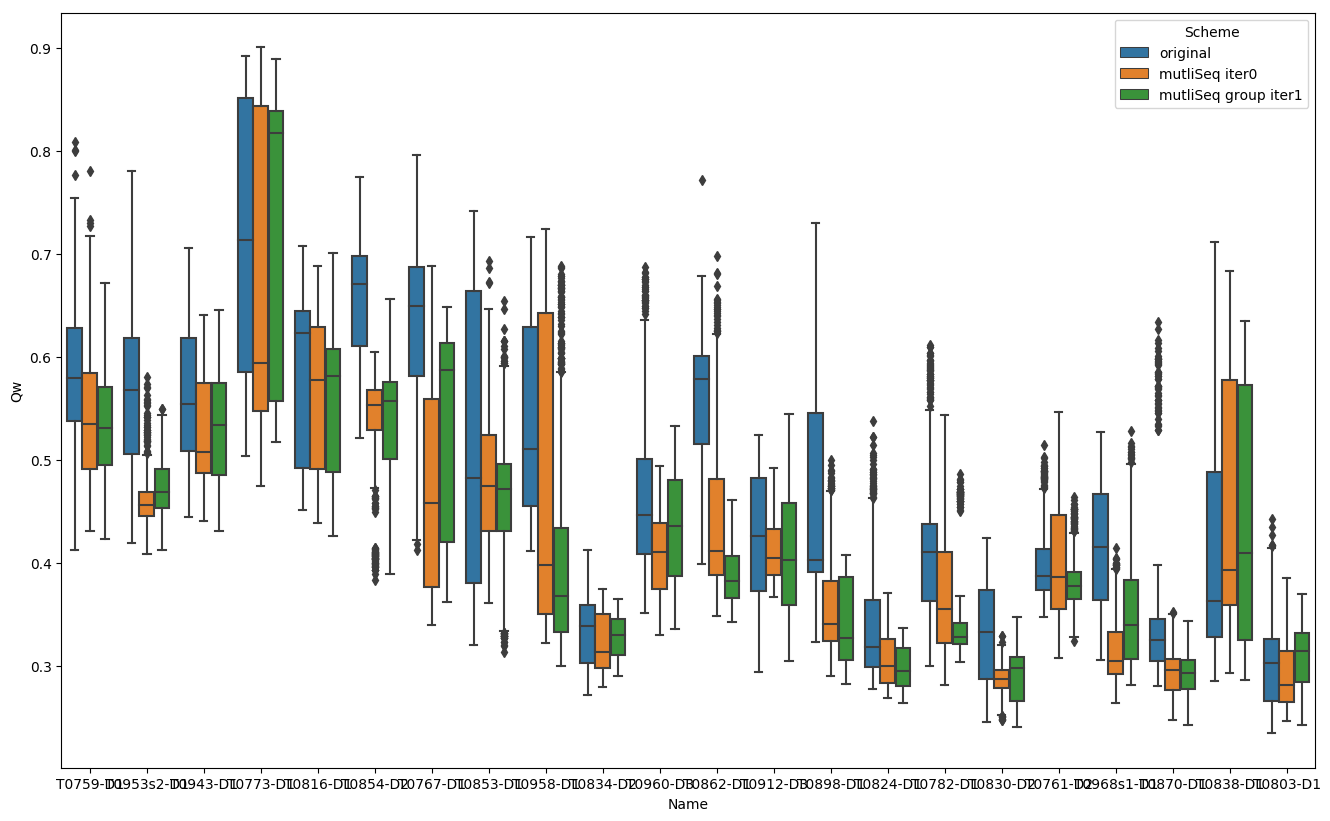

In [16]:
data1 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_single_memory_test_set_04-30.csv", index_col=0)

data2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_single_memory_test_set_04-30.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_single_memory_test_set_04-30.csv", index_col=0)

d = pd.concat([
                data2.assign(Scheme="original"), 
                data1.assign(Scheme="mutliSeq iter0"),  
    data3.assign(Scheme="mutliSeq group iter1"),  
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


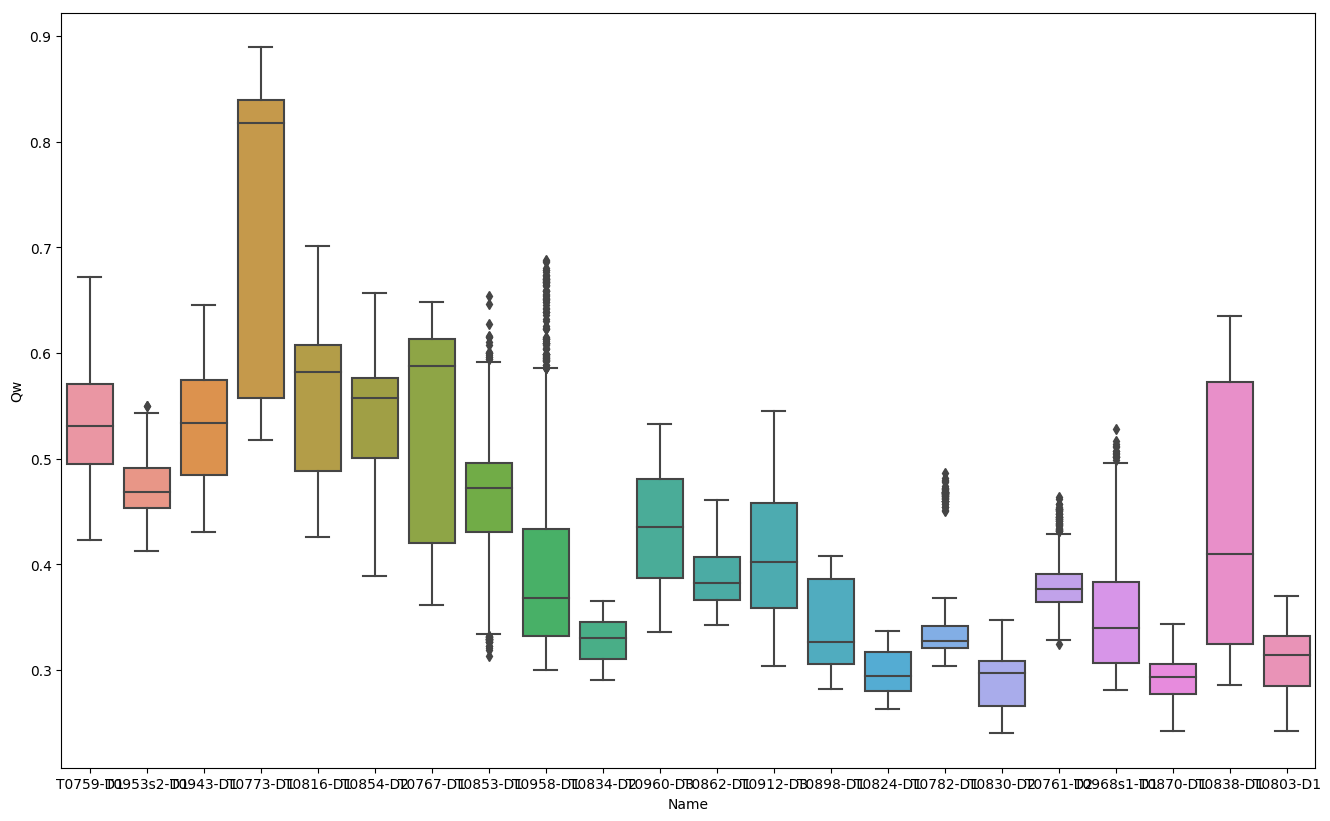

In [14]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "multi_iter1_single_memory"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

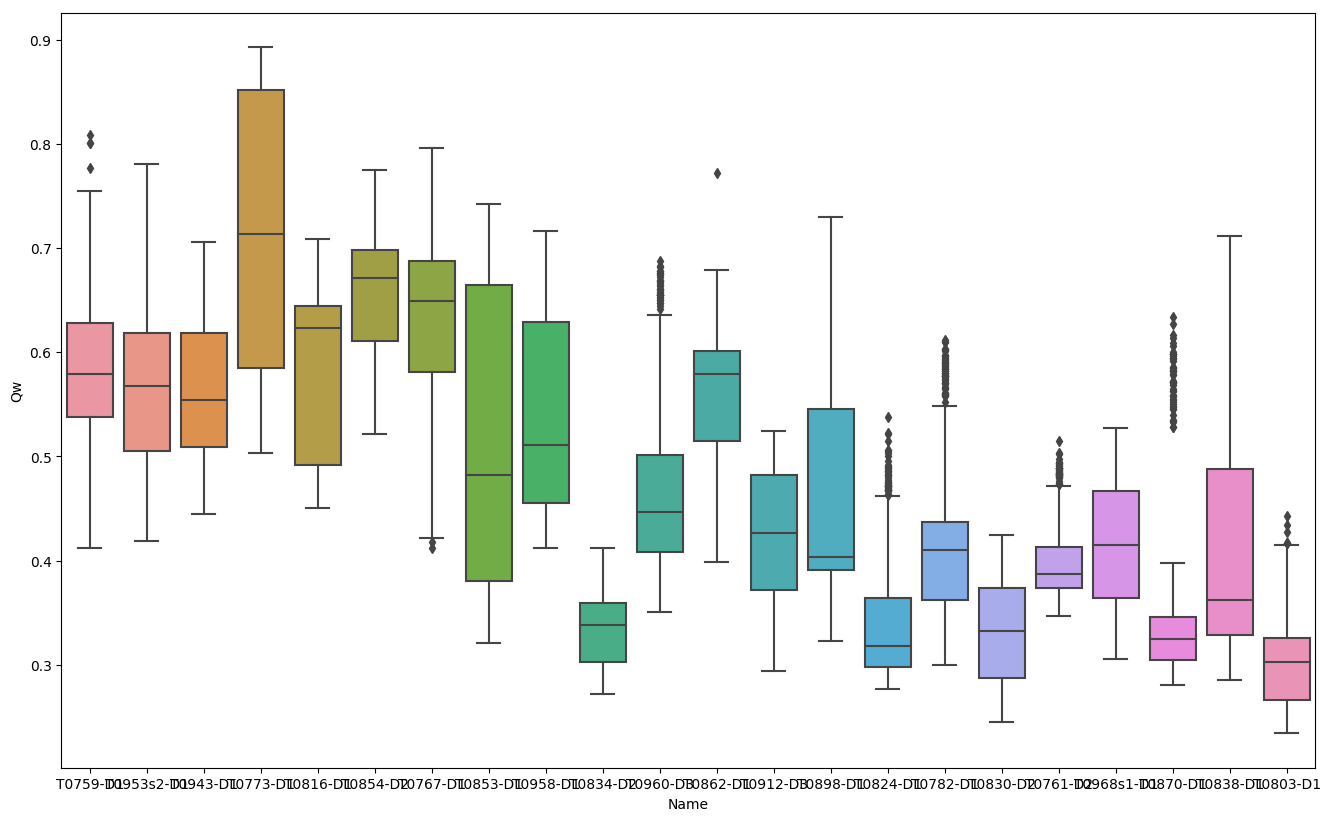

In [13]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "original_single_memory"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

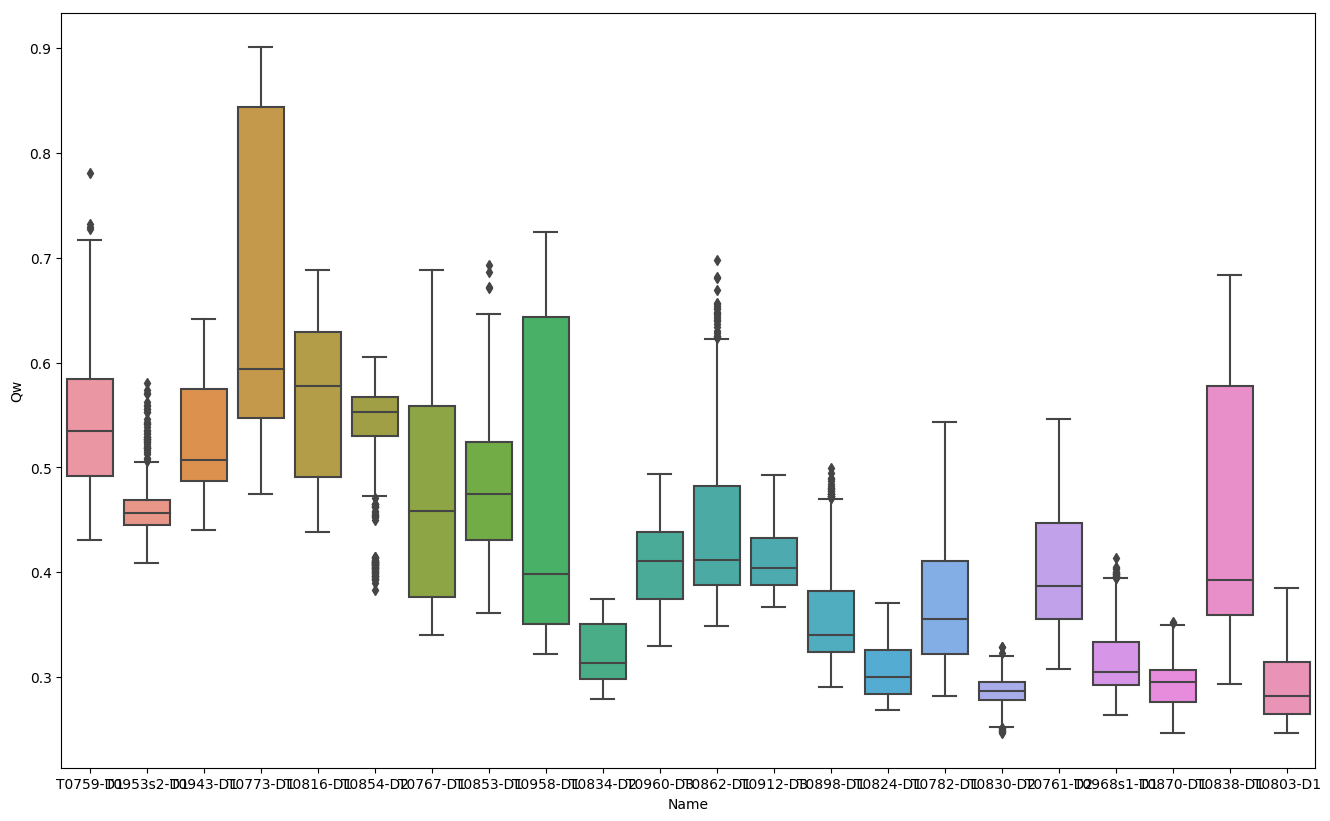

In [11]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "multi_iter0_single_memory"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

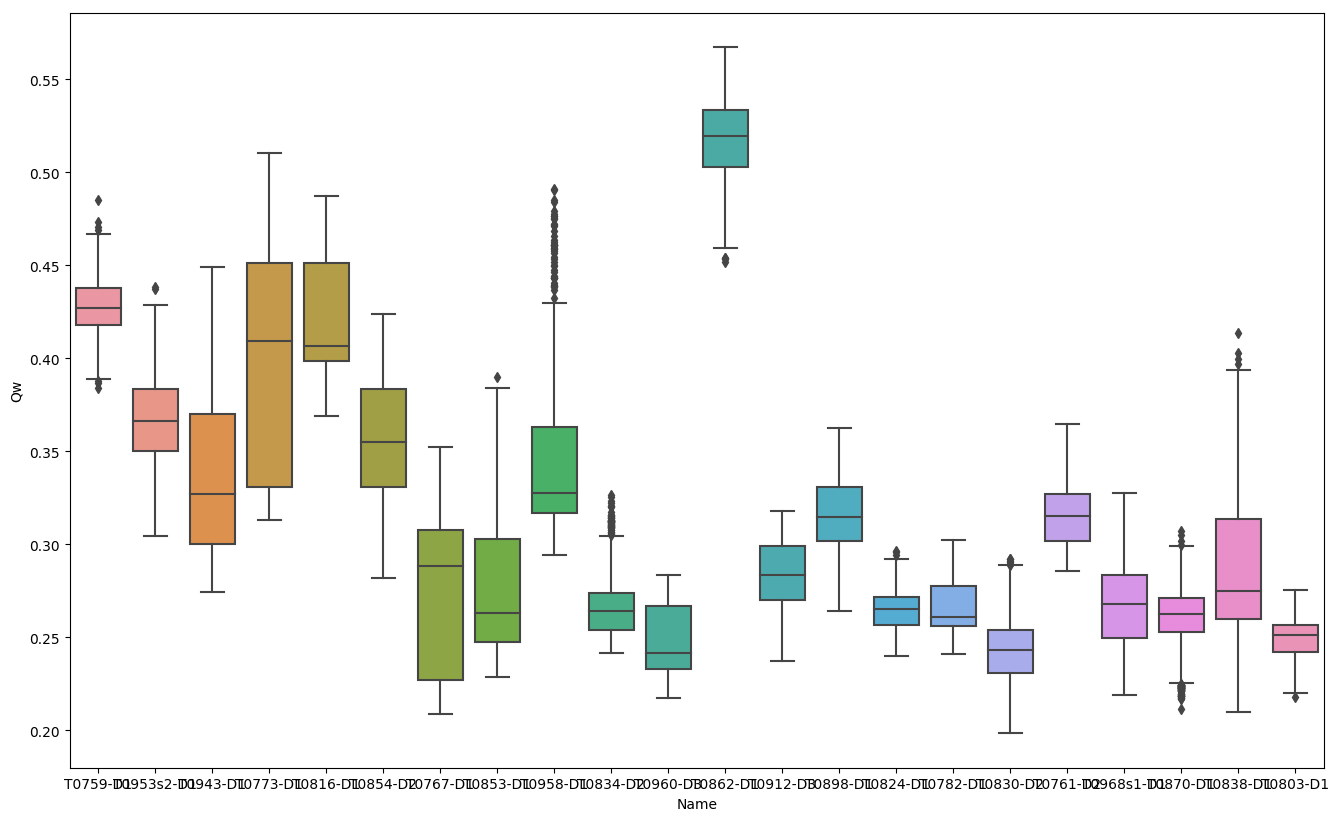

In [6]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "multi_iter1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/0/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/0/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/1/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/1/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/2/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/2/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter2/T0759-D1/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/serve

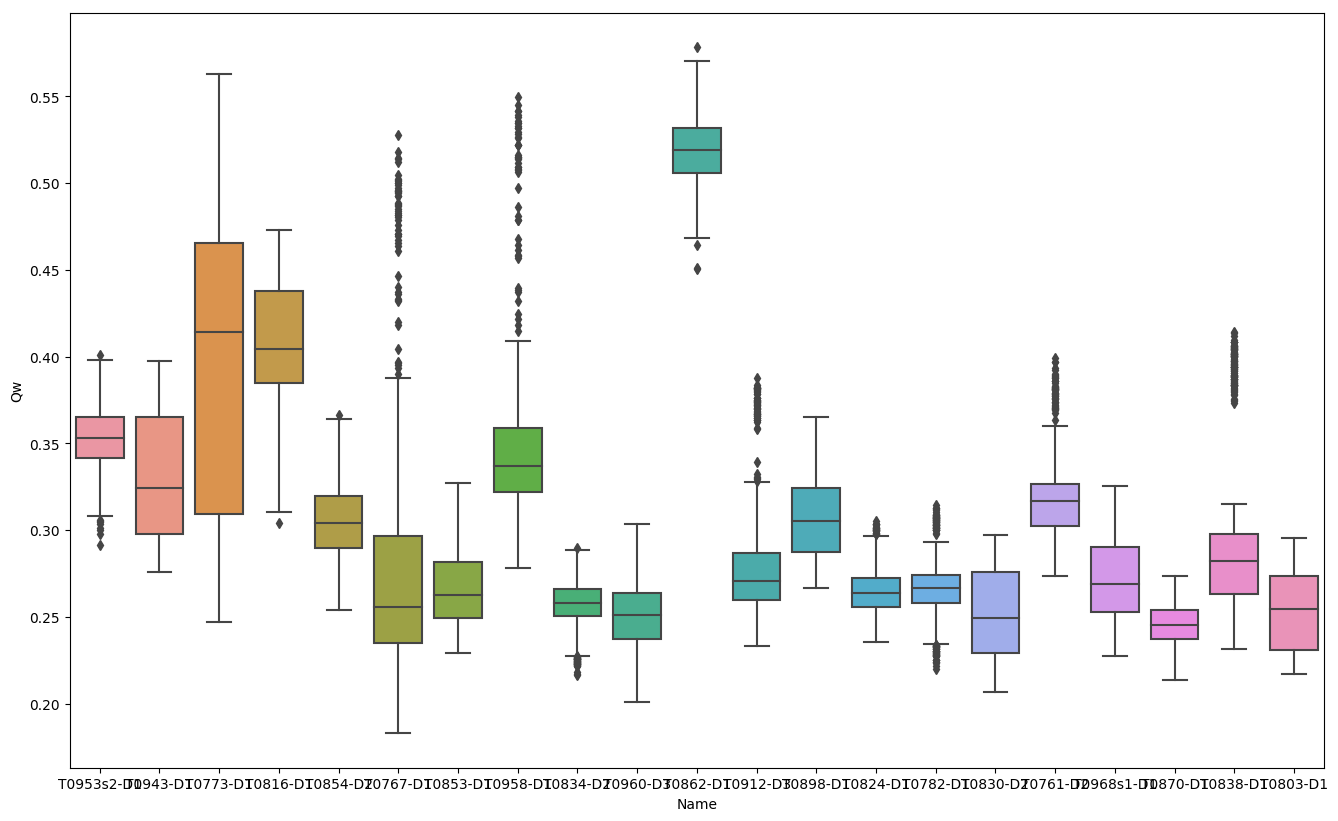

In [31]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "multi_iter2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/0/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/0/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/1/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/1/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/2/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/2/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/original/T0759-D1/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test

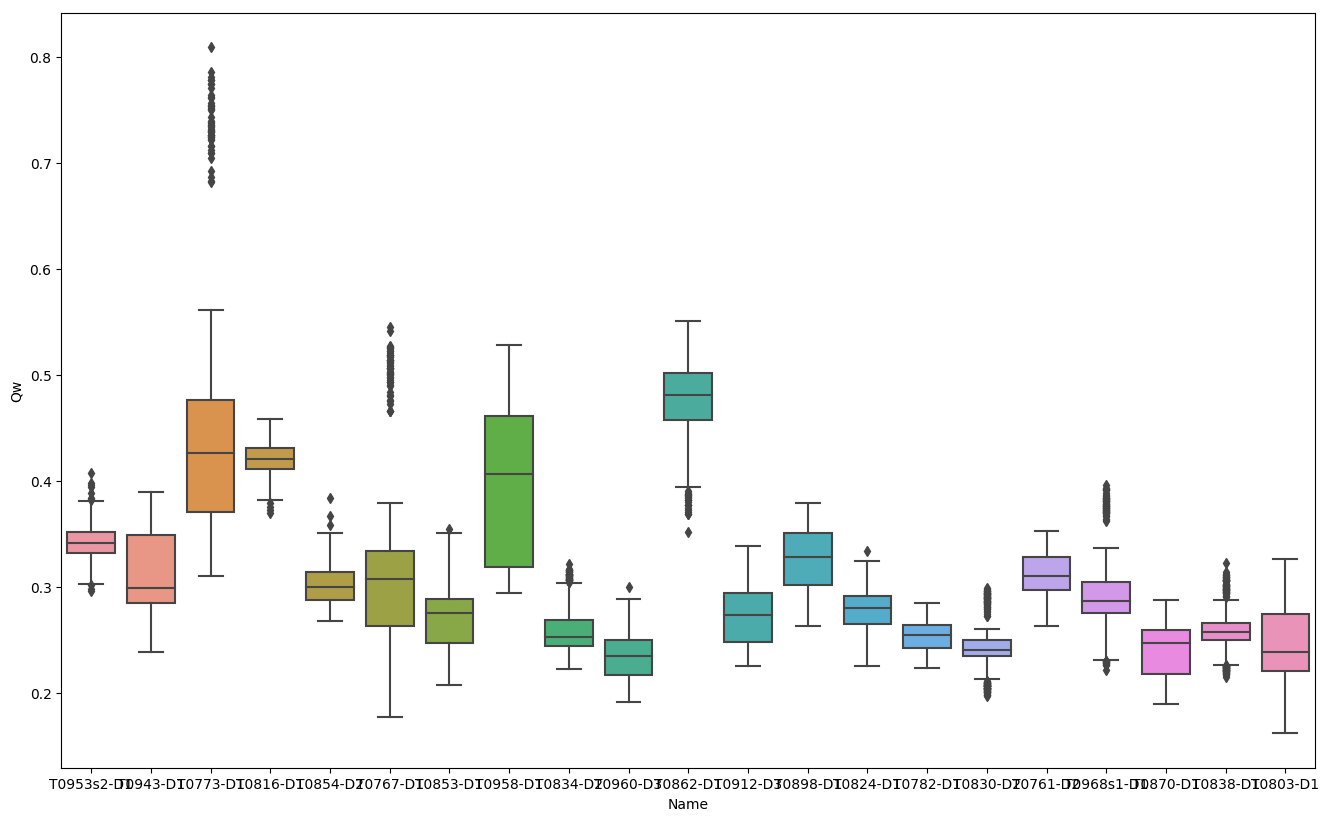

In [7]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "original"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

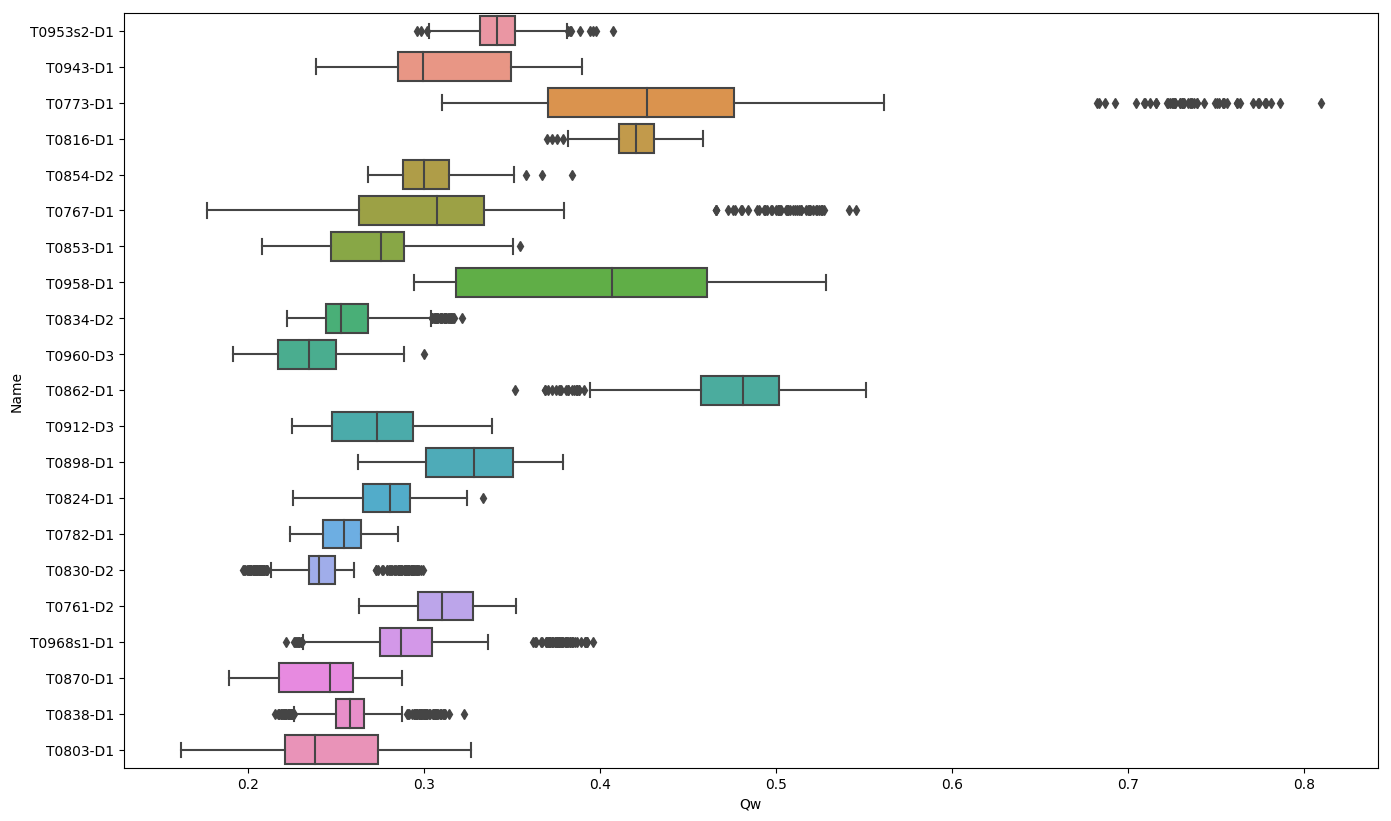

In [10]:
# data_original = data
sns.boxplot("Qw", "Name", data=data_original)

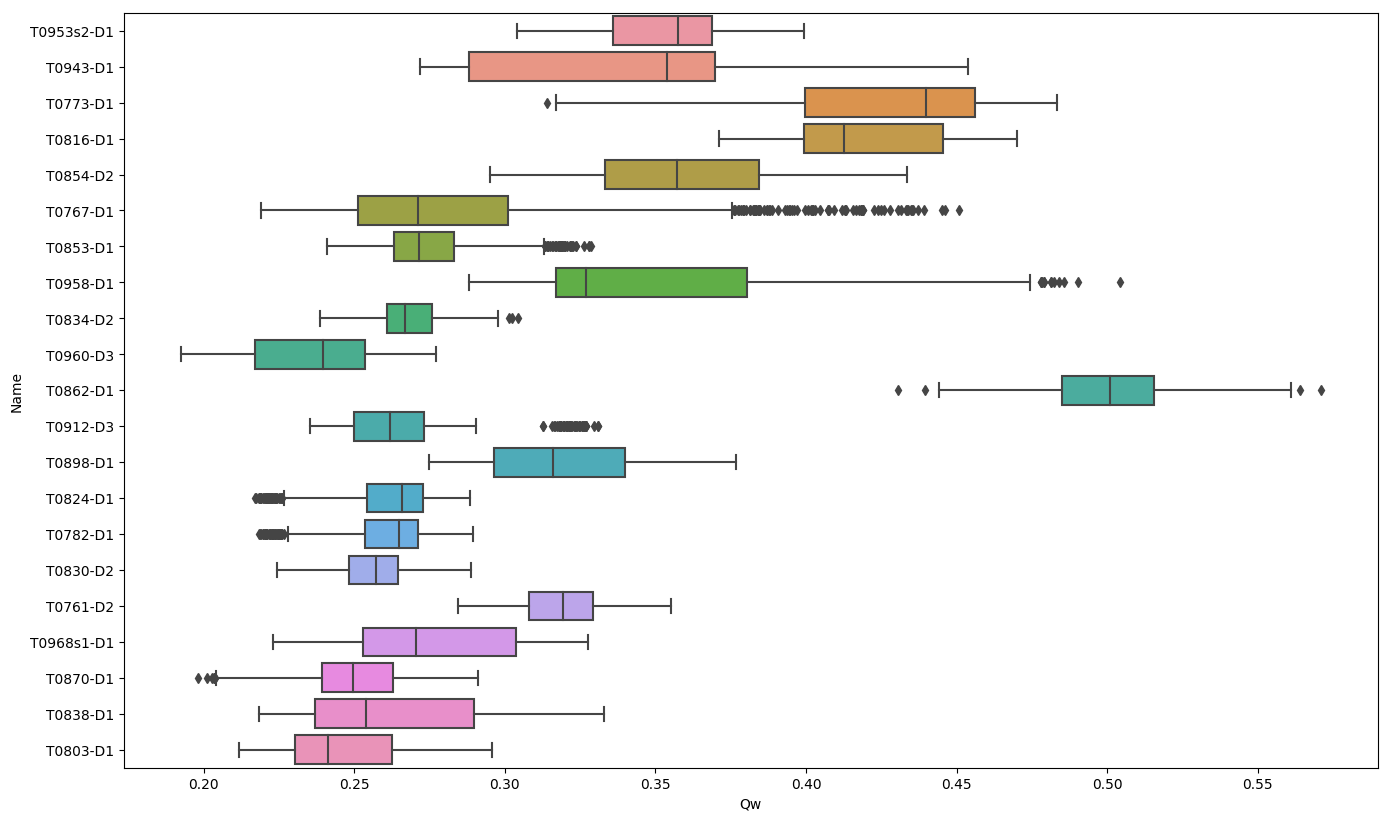

In [13]:
sns.boxplot("Qw", "Name", data=data)

[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/0/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/0/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/1/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/1/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/2/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/2/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_second_2019/test_set/multi_iter0/T0759-D1/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/serve

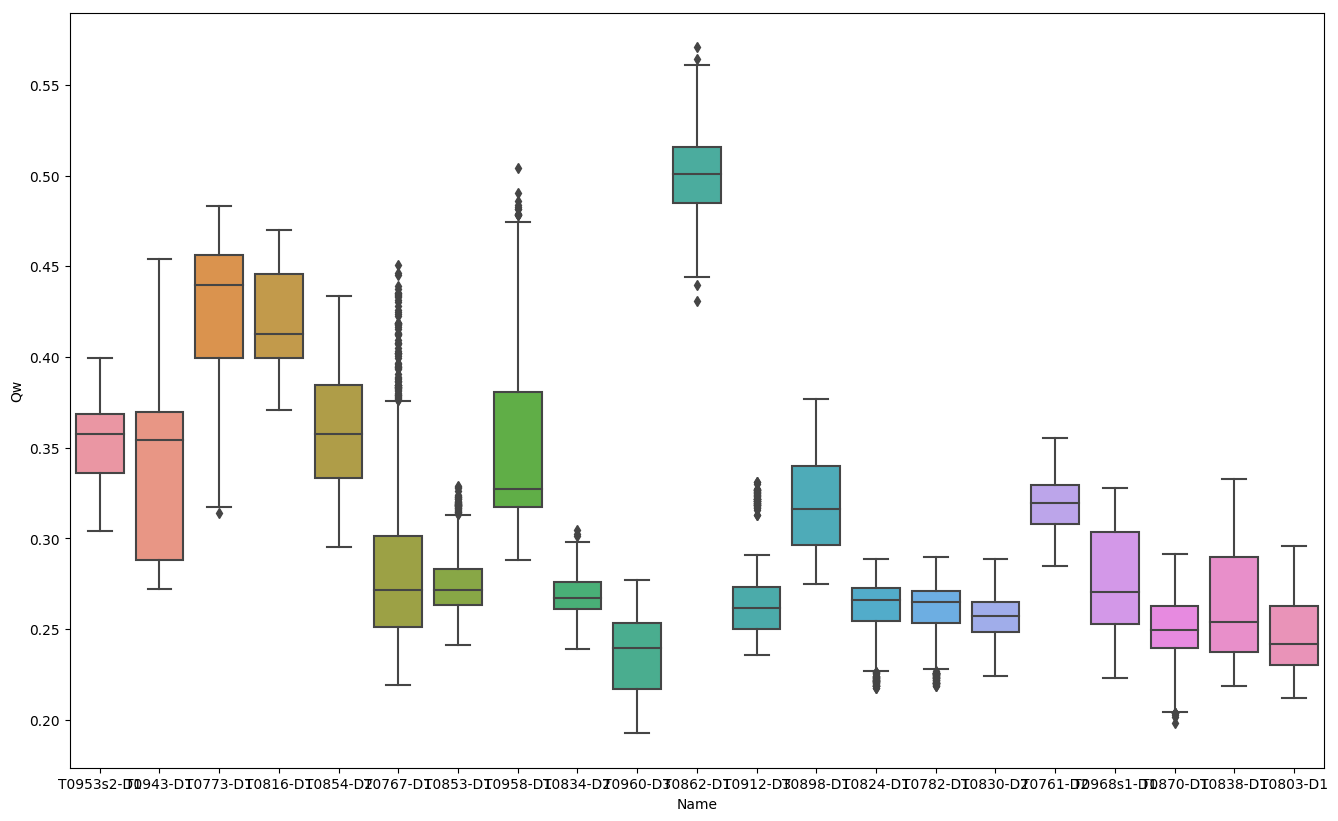

In [11]:
pre = "/Users/weilu/Research/server/april_second_2019/"
folder = "test_set"
pre = pre + folder + "/"
simulationType = "multi_iter0"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, rerun=1, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

In [20]:
d.query("length < 150 and index % 2 == 0")

,index,protein,length
0,0,T0759-D1,34
2,2,T0953s2-D1,44
4,4,T0943-D1,62
6,6,T0773-D1,67
8,8,T0816-D1,68
10,10,T0854-D2,70
12,12,T0767-D1,76
14,14,T0853-D1,76
16,16,T0958-D1,77
18,18,T0834-D2,86


In [23]:
d

,index,protein,length
0,0,T0759-D1,34
1,1,T0955-D1,41
2,2,T0953s2-D1,44
3,3,T0898-D2,55
4,4,T0943-D1,62
5,5,T0759-D2,62
6,6,T0773-D1,67
7,7,T0829-D1,67
8,8,T0816-D1,68
9,9,T0892-D1,69
